<img src="https://pbs.twimg.com/profile_images/378800000236538529/928a7e822ca79f6dc1f4ff1a452adf13.jpeg" alt="Divvy" height="200" width="200">
## Working With The Divvy Dataset
#### Pratik Agrawal
### Introduction
Over the past couple of years Divvy has organized data challenges for invigorating some innovation in the Chicago Data Science community as well as learn new ways to visualize and manage the bike rental system. 
### Problem
There are always Divvy vans that ferry bikes around from station to station based on the lack or surplus of bikes at a given location. This movement of bikes is labor and time intensive. Both of which are high costs that Divvy has to bear. It would be nice to be able to predict the volume of rentals, and allow for precise scheduling.<br> 
In this project I have decided to work with daily rental volume (total rides) as my target variable, and as this is a __supervised__ learning problem the techniques that would be used are as follows-<br>
a) Lasso Regression<br>
b) Ridge Regression<br>
c) Elastic Net<br>
d) Gradient Boosted Regression<br>
### Data Sets
a) Divvy data set 2015 Q1 & Q2<br>
b) Route Information data- In order to enrich the data set with more information, I decided to include distance information (route calculation from HERE.com Route Calculation API) for each origin/destination pair in the dataset.<br>
c) Weather data- weather data from Wunderground.com was downloaded for the period pertaining to the Divvy data set.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import gc
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
warnings.filterwarnings('ignore')

### The Dataset
#### 1. Lets read the readme.txt file supplied with the dataset, and see what all features are included in this data set
*Even though the file is for the 2013 dataset, the columns have not changed much in the current year*

In [3]:
readme_txt_file=open("./week-1/Divvy_Stations_Trips_2013/README.txt",'r')
for line in readme_txt_file.readlines():
    if line!=None:
        print line

This file contains metadata for both the Trips and Stations table.



For more information, see the contest page at http://DivvyBikes.com/datachallenge or email questions to data@DivvyBikes.com. 





Metadata for Trips Table:



Variables:



trip_id: ID attached to each trip taken

starttime: day and time trip started, in CST

stoptime: day and time trip ended, in CST

bikeid: ID attached to each bike

tripduration: time of trip in seconds 

from_station_name: name of station where trip originated

to_station_name: name of station where trip terminated 

from_station_id: ID of station where trip originated

to_station_id: ID of station where trip terminated

usertype: "Customer" is a rider who purchased a 24-Hour Pass; "Subscriber" is a rider who purchased an Annual Membership

gender: gender of rider

birthyear: birth year of rider





Notes:



* First row contains column names

* Total records = 759,789

* Trips that did not include a start or end date were removed from original 

#### From the above information we have a good idea about what the dataset looks like. Under normal circumstances such a clean set is hard to come by. The meta data provided is actually very useful, since that is another feature missing from datasets.
### 2. Read the files

In [3]:
df_trips_1=pd.read_csv("../../data/Divvy_Trips_2015-Q1Q2/Divvy_Trips_2015-Q1.csv", infer_datetime_format=True)
df_trips_2=pd.read_csv("../../data/Divvy_Trips_2015-Q1Q2/Divvy_Trips_2015-Q2.csv", infer_datetime_format=True)
df_stations=pd.read_csv("../../data/Divvy_Trips_2015-Q1Q2/Divvy_Stations_2015.csv")
df_trips = pd.concat([df_trips_1,df_trips_2])

#### Lets take a quick peek at the head for each data frame

In [5]:
df_trips.head()

trip_id        starttime       stoptime  bikeid  tripduration  \
0  4738454  3/31/2015 23:58  4/1/2015 0:03    1095           299   
1  4738450  3/31/2015 23:59  4/1/2015 0:15     537           940   
2  4738449  3/31/2015 23:59  4/1/2015 0:11    2350           751   
3  4738448  3/31/2015 23:59  4/1/2015 0:19     938          1240   
4  4738445  3/31/2015 23:54  4/1/2015 0:15     379          1292   

   from_station_id             from_station_name  to_station_id  \
0              117      Wilton Ave & Belmont Ave            300   
1               43  Michigan Ave & Washington St             85   
2              162    Damen Ave & Wellington Ave             67   
3               51        Clark St & Randolph St             59   
4              134      Peoria St & Jackson Blvd            216   

                 to_station_name    usertype gender  birthyear  
0           Broadway & Barry Ave  Subscriber   Male       1994  
1          Michigan Ave & Oak St    Customer    NaN        NaN  
2  Sheffield Ave & Fullerton Ave  Subscriber   Male       1992  
3      Wabash Ave & Roosevelt Rd    Customer    NaN        NaN  
4   California Ave & Division St  Subscriber   Male       1976

In [6]:
df_stations.head()

id                      name   latitude  longitude  dpcapacity  landmark
0   2  Michigan Ave & Balbo Ave  41.872293 -87.624091          35       541
1   3            Shedd Aquarium  41.867226 -87.615355          31       544
2   4            Burnham Harbor  41.856268 -87.613348          23       545
3   5    State St & Harrison St  41.874053 -87.627716          23        30
4   6            Dusable Harbor  41.885042 -87.612795          31       548

#### The dataframes above can be joined on from_station_id/to_station_id and id

#### Lets look at the shape of the dataframes

In [7]:
df_trips.shape

(1096239, 12)

In [8]:
df_stations.shape

(474, 6)

#### Joining the origin station id with the data from the stations data frame

In [4]:
df_from=pd.merge(df_trips,df_stations,left_on="from_station_id",right_on="id")

In [12]:
df_from.shape

(1096239, 18)

In [13]:
df_from.head()

trip_id        starttime         stoptime  bikeid  tripduration  \
0  4738454  3/31/2015 23:58    4/1/2015 0:03    1095           299   
1  4738431  3/31/2015 23:42  3/31/2015 23:47      68           260   
2  4738386  3/31/2015 23:04  3/31/2015 23:07     422           186   
3  4738303  3/31/2015 22:19  3/31/2015 22:22    1672           145   
4  4738089  3/31/2015 21:07  3/31/2015 21:10    2720           200   

   from_station_id         from_station_name  to_station_id  \
0              117  Wilton Ave & Belmont Ave            300   
1              117  Wilton Ave & Belmont Ave            299   
2              117  Wilton Ave & Belmont Ave            115   
3              117  Wilton Ave & Belmont Ave            296   
4              117  Wilton Ave & Belmont Ave            156   

                  to_station_name    usertype  gender  birthyear   id  \
0            Broadway & Barry Ave  Subscriber    Male       1994  117   
1          Halsted St & Roscoe St  Subscriber    Male       1990  117   
2  Sheffield Ave & Wellington Ave  Subscriber  Female       1989  117   
3          Broadway & Belmont Ave  Subscriber  Female       1987  117   
4       Clark St & Wellington Ave  Subscriber    Male       1987  117   

                       name  latitude  longitude  dpcapacity  landmark  
0  Wilton Ave & Belmont Ave  41.94018  -87.65304          23        69  
1  Wilton Ave & Belmont Ave  41.94018  -87.65304          23        69  
2  Wilton Ave & Belmont Ave  41.94018  -87.65304          23        69  
3  Wilton Ave & Belmont Ave  41.94018  -87.65304          23        69  
4  Wilton Ave & Belmont Ave  41.94018  -87.65304          23        69

#### Joining the destination station id with the data from the stations data frame

In [5]:
df_divvy=pd.merge(df_from,df_stations,left_on="to_station_id",right_on="id")

In [15]:
df_divvy.shape

(1096239, 24)

In [16]:
df_divvy.tail()

trip_id        starttime         stoptime  bikeid  tripduration  \
1096234  5348427   5/27/2015 7:04   5/27/2015 7:21    2817          1023   
1096235  5338209  5/26/2015 10:38  5/26/2015 10:53    2819           912   
1096236  5670422  6/16/2015 18:01  6/16/2015 18:16    3113           869   
1096237  5375075  5/28/2015 15:49  5/28/2015 16:04    2004           892   
1096238  5611858   6/13/2015 9:36   6/13/2015 9:42    4703           374   

         from_station_id           from_station_name  to_station_id  \
1096234              428    Dorchester Ave & 63rd St            390   
1096235              428    Dorchester Ave & 63rd St            390   
1096236               95  Stony Island Ave & 64th St            390   
1096237              391        Halsted St & 69th St            390   
1096238              388        Halsted St & 63rd St            390   

                 to_station_name    usertype    ...     latitude_x  \
1096234  Wentworth Ave & 63rd St  Subscriber    ...      41.780406   
1096235  Wentworth Ave & 63rd St  Subscriber    ...      41.780406   
1096236  Wentworth Ave & 63rd St  Subscriber    ...      41.778701   
1096237  Wentworth Ave & 63rd St  Subscriber    ...      41.769062   
1096238  Wentworth Ave & 63rd St  Subscriber    ...      41.779381   

         longitude_x  dpcapacity_x landmark_x  id_y                   name_y  \
1096234   -87.591416            15        484   390  Wentworth Ave & 63rd St   
1096235   -87.591416            15        484   390  Wentworth Ave & 63rd St   
1096236   -87.586788            15        490   390  Wentworth Ave & 63rd St   
1096237   -87.644614            15        597   390  Wentworth Ave & 63rd St   
1096238   -87.644621            15        595   390  Wentworth Ave & 63rd St   

         latitude_y  longitude_y  dpcapacity_y landmark_y  
1096234    41.78008   -87.629746            15        596  
1096235    41.78008   -87.629746            15        596  
1096236    41.78008   -87.629746            15        596  
1096237    41.78008   -87.629746            15        596  
1096238    41.78008   -87.629746            15        596  

[5 rows x 24 columns]

#### Lets try a sample call to the HERE maps api

In [16]:
from urllib2 import urlopen
from StringIO import StringIO
import simplejson

#### To use the here.com api, one has to register as a developer, and is limited to a 100K calls/month
##### For security purposes the application id and code for my dev user has not been included in the api call made below.

In [17]:
url = urlopen('http://route.cit.api.here.com/routing/7.2/calculateroute.json?app_id=APP_ID&app_code=APP_CODE&waypoint0=geo!41.90096,-87.623777&waypoint1=geo!41.91468,-87.64332&mode=fastest;car;traffic:disabled').read()

In [18]:
json_array = simplejson.loads(url)

#### Lets take a look at what the HERE Calcuate Route API response looks like

In [19]:
json_array

{u'response': {u'language': u'en-us',
  u'metaInfo': {u'interfaceVersion': u'2.6.18',
   u'mapVersion': u'8.30.60.106',
   u'moduleVersion': u'7.2.63.0-1185',
   u'timestamp': u'2015-12-08T21:37:18Z'},
  u'route': [{u'leg': [{u'end': {u'label': u'W Menomonee St',
       u'linkId': u'+19805890',
       u'mappedPosition': {u'latitude': 41.9146268, u'longitude': -87.6433185},
       u'mappedRoadName': u'W Menomonee St',
       u'originalPosition': {u'latitude': 41.9146799, u'longitude': -87.64332},
       u'shapeIndex': 60,
       u'sideOfStreet': u'left',
       u'spot': 0.1862745,
       u'type': u'stopOver'},
      u'length': 3620,
      u'maneuver': [{u'_type': u'PrivateTransportManeuverType',
        u'id': u'M1',
        u'instruction': u'Head toward <span class="toward_street">N Michigan Ave</span> on <span class="street">E Lake Shore Dr</span>. <span class="distance-description">Go for <span class="length">23 m</span>.</span>',
        u'length': 23,
        u'position': {u'latitu

#### To access the distance between the two points provided in the API request, we can look at the summary section of the JSON object

In [22]:
print json_array['response']['route'][0]['summary']['distance']

3620


#### Similarly we can access other parameters such as base time and traffic time (both have been provided for vehicle based routing). This API however does not provide estimates as to how traffic affects the bicycle times.

In [23]:
print "base_time: ",json_array['response']['route'][0]['summary']['baseTime']
print "traffic_time: ",json_array['response']['route'][0]['summary']['trafficTime']

base_time:  431
traffic_time:  431


#### Lets create a function to query the HERE.com Calculate Route API for any two locations. And also test this with the first two rows of the data set

In [24]:
def calc_dist_time(x):
    url = urlopen('http://route.cit.api.here.com/routing/7.2/calculateroute.json?app_id=APP_ID&app_code=APP_CODE&waypoint0=geo!%s,%s&waypoint1=geo!%s,%s&mode=fastest;car;traffic:disabled'%(x.latitude_x, x.longitude_x, x.latitude_y, x.longitude_y)).read()
    json_array = simplejson.loads(url)
    base_time=json_array['response']['route'][0]['summary']['baseTime']
    traffic_time=json_array['response']['route'][0]['summary']['trafficTime']
    distance=json_array['response']['route'][0]['summary']['distance']
    return pd.Series({'base_time':base_time,
                      'traffic_time':traffic_time,
                      'distance':distance,
                      'json_array':json_array})
df_dist=df_divvy.head(2).apply(calc_dist_time,axis=1)


In [25]:
df_dist

base_time  distance                                         json_array  \
0        208       923  {u'response': {u'route': [{u'leg': [{u'start':...   
1        208       923  {u'response': {u'route': [{u'leg': [{u'start':...   

   traffic_time  
0           208  
1           208

In [26]:
df_dist.json_array[0]['response']['route'][0]['summary']

{u'_type': u'RouteSummaryType',
 u'baseTime': 208,
 u'distance': 923,
 u'text': u'The trip takes <span class="length">923 m</span> and <span class="time">3 mins</span>.',
 u'trafficTime': 208,
 u'travelTime': 208}

#### Now lets do a simple reduction in the number of calls made to the HERE.com API

In [29]:
df_temp=df_divvy.drop_duplicates(["latitude_x","longitude_x","latitude_y","longitude_y"])

In [30]:
df_temp

trip_id        starttime         stoptime  bikeid  tripduration  \
0        4738454  3/31/2015 23:58    4/1/2015 0:03    1095           299   
181      4447991  1/17/2015 15:26  1/17/2015 15:57     645          1859   
184      4631588  3/14/2015 18:20  3/14/2015 18:38    1226          1103   
192      4735646  3/31/2015 17:16  3/31/2015 17:37    1312          1296   
211      5541584   6/8/2015 19:24   6/8/2015 19:47     447          1406   
212      4701072  3/25/2015 13:24  3/25/2015 13:27    2307           206   
258      4549043  2/21/2015 19:14  2/21/2015 19:25    2838           666   
297      4729704  3/30/2015 20:48  3/30/2015 20:52    1378           236   
455      4715047  3/27/2015 19:12  3/27/2015 19:28     156           975   
462      4710867  3/26/2015 21:48  3/26/2015 22:19    2652          1836   
464      4583510   3/7/2015 17:49   3/7/2015 18:11    1354          1305   
475      4732365   3/31/2015 9:58  3/31/2015 10:04    2665           328   
584      4730061  3/30/2015 23:06  3/30/2015 23:11    2665           340   
654      4583842   3/7/2015 19:35   3/7/2015 20:05     901          1832   
658      5900079  6/28/2015 17:20  6/28/2015 17:45     816          1463   
661      5689226  6/17/2015 20:56  6/17/2015 21:29    3210          2020   
674      4738269  3/31/2015 22:06  3/31/2015 22:20     275           815   
685      5598352  6/11/2015 19:29  6/11/2015 19:48    3544          1143   
691      5823135  6/24/2015 18:35  6/24/2015 18:59    1583          1425   
696      4710879  3/26/2015 21:56  3/26/2015 22:01      47           333   
755      5287774  5/23/2015 13:38  5/23/2015 14:07    3216          1763   
762      4577260   3/5/2015 20:16   3/5/2015 20:33    2882          1018   
764      4688122  3/21/2015 17:25  3/21/2015 17:56    1566          1835   
770      4730249   3/31/2015 5:53   3/31/2015 5:56    1874           210   
843      4586767   3/8/2015 19:04   3/8/2015 19:25     255          1232   
896      5494650   6/5/2015 19:09   6/5/2015 19:33    3841          1459   
903      4489974  1/28/2015 17:06  1/28/2015 17:28    2348          1300   
909      4698242  3/24/2015 18:58  3/24/2015 19:12    2097           831   
933      5917464  6/29/2015 18:07  6/29/2015 18:35    4801          1705   
943      5415928   6/1/2015 10:13   6/1/2015 10:37    1654          1491   
...          ...              ...              ...     ...           ...   
1096099  5693185   6/18/2015 8:25   6/18/2015 8:28    2565           169   
1096103  5358950  5/27/2015 17:26  5/27/2015 17:49    3088          1387   
1096105  5623204  6/13/2015 15:58  6/13/2015 16:17    4162          1193   
1096107  5512307   6/6/2015 17:26   6/6/2015 17:52     464          1580   
1096111  5323270  5/25/2015 15:15  5/25/2015 15:24    2552           525   
1096112  5066271    5/6/2015 1:15    5/6/2015 1:47    1917          1906   
1096113  5849870  6/26/2015 11:54  6/26/2015 12:32    3427          2243   
1096140  5844122   6/26/2015 1:17   6/26/2015 1:51     181          2035   
1096150  5462865    6/4/2015 1:20    6/4/2015 1:36    3067           930   
1096151  5640401  6/14/2015 17:28  6/14/2015 17:48    2124          1182   
1096153  5506391   6/6/2015 14:32   6/6/2015 14:53    4807          1290   
1096156  5608714  6/12/2015 20:12  6/12/2015 20:21    3427           555   
1096160  5065189   5/5/2015 19:40   5/5/2015 19:45    3384           323   
1096162  5462194   6/3/2015 22:29   6/3/2015 23:31    2951          3734   
1096164  5309393  5/24/2015 13:46  5/24/2015 14:09    4324          1418   
1096167  5385239   5/29/2015 2:00   5/29/2015 2:18    4308          1101   
1096168  5269119  5/22/2015 11:55  5/22/2015 12:11    1625           972   
1096169  5071931   5/6/2015 15:23   5/6/2015 15:56     951          2005   
1096170  5844083   6/26/2015 0:55   6/26/2015 1:16     800          1262   
1096181  5835361  6/25/2015 15:37  6/25/2015 16:13    2124          2138   
1096223  5762229  6/21/2015 17:35  6/21/2015 18:56     90

#### As can be seen from above, the number of calls that will need to be made to the HERE.com API is 65K, which is well below the monthly quota. This can be further reduced by removing the duplicated between x-y and y-x combinations of the locations. 
#### Note: I tried Google Maps API (only a few thousand free calls, and throttled/denied thereafter), as well as Open Street Maps API, and only found HERE.com API to be the most responsive, and best in class in terms of quota.
#### Lets run the query for each combination of location in this reduced dataset
*I already ran the code below prior to forming this notebook, and had saved the results of the queries. Hence you will not see execution numbers for some of the code blocks*

In [ ]:
df_dist=df_temp.apply(calc_dist_time,axis=1)

In [33]:
df_dist_matrix = df_divvy[["latitude_x","longitude_x","latitude_y","longitude_y"]]

In [66]:
df_dist_time = pd.merge(df_dist_matrix,df_dist,left_on="ix",right_on="ix")

In [76]:
df_dist_time["key"] = "%s_%s_%s_%s"%(str(df_dist_time.latitude_x),
                                     str(df_dist_time.longitude_x),
                                     str(df_dist_time.latitude_y),
                                     str(df_dist_time.longitude_y))

In [80]:
df_divvy["key"] = "%s_%s_%s_%s"%(str(df_divvy.latitude_x),
                                     str(df_divvy.longitude_x),
                                     str(df_divvy.latitude_y),
                                     str(df_divvy.longitude_y))

In [89]:
df_dist_time.to_csv('../../data/Divvy_Trips_2015-Q1Q2/lat_lon_dist_time.csv')

In [17]:
df_dist_time = pd.read_csv('../../data/Divvy_Trips_2015-Q1Q2/lat_lon_dist_time.csv')

In [18]:
list(df_dist_time.columns)

['Unnamed: 0',
 'ix',
 'latitude_x',
 'longitude_x',
 'latitude_y',
 'longitude_y',
 'base_time',
 'distance',
 'json_array',
 'traffic_time']

In [19]:
df_divvy = pd.merge(df_divvy,df_dist_time,left_on=["latitude_x","longitude_x","latitude_y","longitude_y"],right_on=["latitude_x","longitude_x","latitude_y","longitude_y"])

In [20]:
df_divvy.drop(["ix","json_array"],axis=1,inplace=True)

In [39]:
len(list(df_divvy.columns))

28

#### Lets save this data set

In [102]:
df_divvy.to_csv('../../data/Divvy_Trips_2015-Q1Q2/complete-data.csv')

#### We can free up the memory, by forcing garbage collection. I've done this as there is lot of data held in memory, and there is no further use for it.

In [8]:
df_dist=[]
df_dist_matrix=[]
df_dist_time=[]
df_from=[]
df_trips=[]
df_trips_1=[]
df_trips_2=[]
df_divvy_all=[]
import gc
gc.collect()

114

#### Lets also download weather information for each day of Q1 & Q2 2015. For this purpose I downloaded the weather history from wunderground.com
*Note: Code execution resumes from here, as code above requires a dev account to make calls to HERE.com*

In [22]:
weather = pd.read_csv('../../data/Divvy_Trips_2015-Q1Q2/CustomWeather.csv')
weather.head()

CDT  Max TemperatureF  Mean TemperatureF  Min TemperatureF  \
0  1/1/15                32                 25                17   
1  1/2/15                36                 28                20   
2  1/3/15                37                 34                31   
3  1/4/15                36                 21                 5   
4  1/5/15                10                  5                -1   

   Max Dew PointF  MeanDew PointF  Min DewpointF  Max Humidity  \
0              16              11              4            63   
1              22              19             15            82   
2              36              32             22           100   
3              35              22             -5            97   
4               5              -3            -10            84   

    Mean Humidity   Min Humidity       ...         Max VisibilityMiles  \
0              54             33       ...                          10   
1              64             39       ...                          10   
2              90             61       ...                          10   
3              82             44       ...                          10   
4              67             45       ...                          10   

    Mean VisibilityMiles   Min VisibilityMiles   Max Wind SpeedMPH  \
0                     10                    10                  24   
1                     10                    10                  10   
2                      3                     1                  12   
3                      4                     0                  24   
4                      6                     0                  17   

    Mean Wind SpeedMPH   Max Gust SpeedMPH  PrecipitationIn   CloudCover  \
0                   15                  30                0            3   
1                    5                  16                0            5   
2                    5                  14             0.55            8   
3                   13                  32              0.1            7   
4                   10                  22             0.11            5   

      Events  WindDirDegrees  
0        NaN             241  
1        NaN             193  
2  Rain-Snow              42  
3  Rain-Snow             305  
4       Snow             252  

[5 rows x 23 columns]

In [23]:
list(weather.columns)

['CDT',
 'Max TemperatureF',
 'Mean TemperatureF',
 'Min TemperatureF',
 'Max Dew PointF',
 'MeanDew PointF',
 'Min DewpointF',
 'Max Humidity',
 ' Mean Humidity',
 ' Min Humidity',
 ' Max Sea Level PressureIn',
 ' Mean Sea Level PressureIn',
 ' Min Sea Level PressureIn',
 ' Max VisibilityMiles',
 ' Mean VisibilityMiles',
 ' Min VisibilityMiles',
 ' Max Wind SpeedMPH',
 ' Mean Wind SpeedMPH',
 ' Max Gust SpeedMPH',
 'PrecipitationIn',
 ' CloudCover',
 ' Events',
 ' WindDirDegrees']

#### Lets clean the column names, and get rid of the leading white space

In [24]:
weather.columns=[c.strip(" ") for c in weather.columns]

In [25]:
list(weather.columns)

['CDT',
 'Max TemperatureF',
 'Mean TemperatureF',
 'Min TemperatureF',
 'Max Dew PointF',
 'MeanDew PointF',
 'Min DewpointF',
 'Max Humidity',
 'Mean Humidity',
 'Min Humidity',
 'Max Sea Level PressureIn',
 'Mean Sea Level PressureIn',
 'Min Sea Level PressureIn',
 'Max VisibilityMiles',
 'Mean VisibilityMiles',
 'Min VisibilityMiles',
 'Max Wind SpeedMPH',
 'Mean Wind SpeedMPH',
 'Max Gust SpeedMPH',
 'PrecipitationIn',
 'CloudCover',
 'Events',
 'WindDirDegrees']

#### Lets convert the date feature of both df_divvy and weather data to the sklearn datetime object. 

In [26]:
df_divvy.drop("Unnamed: 0",axis=1,inplace=True)

In [27]:
df_divvy["date"]=df_divvy.starttime.apply(lambda x: x.split(" ")[0])

In [28]:
df_divvy["date"]=pd.to_datetime(df_divvy.date)

In [29]:
df_divvy.head()

trip_id        starttime         stoptime  bikeid  tripduration  \
0  4738454  3/31/2015 23:58    4/1/2015 0:03    1095           299   
1  4731216   3/31/2015 8:03   3/31/2015 8:08     719           313   
2  4729848  3/30/2015 21:22  3/30/2015 21:27     168           310   
3  4729672  3/30/2015 20:42  3/30/2015 20:51    2473           595   
4  4715390  3/27/2015 21:26  3/27/2015 21:31    1614           312   

   from_station_id         from_station_name  to_station_id  \
0              117  Wilton Ave & Belmont Ave            300   
1              117  Wilton Ave & Belmont Ave            300   
2              117  Wilton Ave & Belmont Ave            300   
3              117  Wilton Ave & Belmont Ave            300   
4              117  Wilton Ave & Belmont Ave            300   

        to_station_name    usertype    ...     id_y                name_y  \
0  Broadway & Barry Ave  Subscriber    ...      300  Broadway & Barry Ave   
1  Broadway & Barry Ave  Subscriber    ...      300  Broadway & Barry Ave   
2  Broadway & Barry Ave  Subscriber    ...      300  Broadway & Barry Ave   
3  Broadway & Barry Ave  Subscriber    ...      300  Broadway & Barry Ave   
4  Broadway & Barry Ave  Subscriber    ...      300  Broadway & Barry Ave   

   latitude_y longitude_y  dpcapacity_y  landmark_y  base_time  distance  \
0   41.937725  -87.644095            19         137        208       923   
1   41.937725  -87.644095            19         137        208       923   
2   41.937725  -87.644095            19         137        208       923   
3   41.937725  -87.644095            19         137        208       923   
4   41.937725  -87.644095            19         137        208       923   

   traffic_time       date  
0           211 2015-03-31  
1           211 2015-03-31  
2           211 2015-03-30  
3           211 2015-03-30  
4           211 2015-03-27  

[5 rows x 28 columns]

In [30]:
weather["CDT"]=pd.to_datetime(weather.CDT)

In [31]:
weather.head()

CDT  Max TemperatureF  Mean TemperatureF  Min TemperatureF  \
0 2015-01-01                32                 25                17   
1 2015-01-02                36                 28                20   
2 2015-01-03                37                 34                31   
3 2015-01-04                36                 21                 5   
4 2015-01-05                10                  5                -1   

   Max Dew PointF  MeanDew PointF  Min DewpointF  Max Humidity  Mean Humidity  \
0              16              11              4            63             54   
1              22              19             15            82             64   
2              36              32             22           100             90   
3              35              22             -5            97             82   
4               5              -3            -10            84             67   

   Min Humidity      ...        Max VisibilityMiles  Mean VisibilityMiles  \
0            33      ...                         10                    10   
1            39      ...                         10                    10   
2            61      ...                         10                     3   
3            44      ...                         10                     4   
4            45      ...                         10                     6   

   Min VisibilityMiles  Max Wind SpeedMPH  Mean Wind SpeedMPH  \
0                   10                 24                  15   
1                   10                 10                   5   
2                    1                 12                   5   
3                    0                 24                  13   
4                    0                 17                  10   

   Max Gust SpeedMPH  PrecipitationIn  CloudCover     Events WindDirDegrees  
0                 30                0           3        NaN            241  
1                 16                0           5        NaN            193  
2                 14             0.55           8  Rain-Snow             42  
3                 32              0.1           7  Rain-Snow            305  
4                 22             0.11           5       Snow            252  

[5 rows x 23 columns]

In [32]:
weather.PrecipitationIn=weather.PrecipitationIn.convert_objects(convert_numeric=True)

## Analysis
### EDA
#### Now that we have all the data in order, lets take a look at where these stations are located on the map. We will also plot a random sampling of the user types (subscribers v/s customers) and the stations they travel between

In [6]:
from IPython.display import HTML
import folium

def inline_map(map):
    """
    Embeds the HTML source of the map directly into the IPython notebook.
    
    This method will not work if the map depends on any files (json data). Also this uses
    the HTML5 srcdoc attribute, which may not be supported in all browsers.
    """
    map._build_map()
    return HTML('<iframe srcdoc="{srcdoc}" style="width: 100%; height: 510px; border: none"></iframe>'.format(srcdoc=map.HTML.replace('"', '&quot;')))

def embed_map(map, path="map.html"):
    """
    Embeds a linked iframe to the map into the IPython notebook.
    
    Note: this method will not capture the source of the map into the notebook.
    This method should work for all maps (as long as they use relative urls).
    """
    map.create_map(path=path)
    return HTML('<iframe src="files/{path}" style="width: 100%; height: 510px; border: none"></iframe>'.format(path=path))

In [7]:
map_osm = folium.Map(location=[41.9065732,-87.7142335],tiles='Stamen Toner',zoom_start=11)
for i in range(0,df_stations.shape[0]):
    map_osm.circle_marker(location=[df_stations.latitude[i], df_stations.longitude[i]], radius=75,line_color='blue',
                    fill_color='blue')

np.random.seed(123)
numbers = np.arange(1,1000000)
np.random.shuffle(numbers)

for i in range(1,10000):
    if(df_divvy.usertype[numbers[i]]=="Subscriber"):
        map_osm.line([[df_divvy.latitude_x[numbers[i]],df_divvy.longitude_x[numbers[i]]],[df_divvy.latitude_y[numbers[i]],df_divvy.longitude_y[numbers[i]]]], line_color="red", line_weight=0.5)
    else:
        map_osm.line([[df_divvy.latitude_x[numbers[i]],df_divvy.longitude_x[numbers[i]]],[df_divvy.latitude_y[numbers[i]],df_divvy.longitude_y[numbers[i]]]], line_color="green", line_weight=0.5)
inline_map(map_osm)

#### As can be seen from the above map-
a) Subscribers are marked with the red lines.<br>
b) Customers are market with green lines.<br>
c) Subscribers tend to use this service more as a daily commute option versus customers who use this for shorter distances.<br>
d) Customers tend to run the bikes in the more tourist-y areas (Lake Shore Trail, Loop, Millenium Park).<br> 
e) The bike stations on the periphery of the map see the least traffic.<br>
##### Note: The above map is interactive, so you should be able to zoom in/out and pan throughout.

##### 1. Lets look at the distances travelled by usertype (Customer v/s Subscriber)

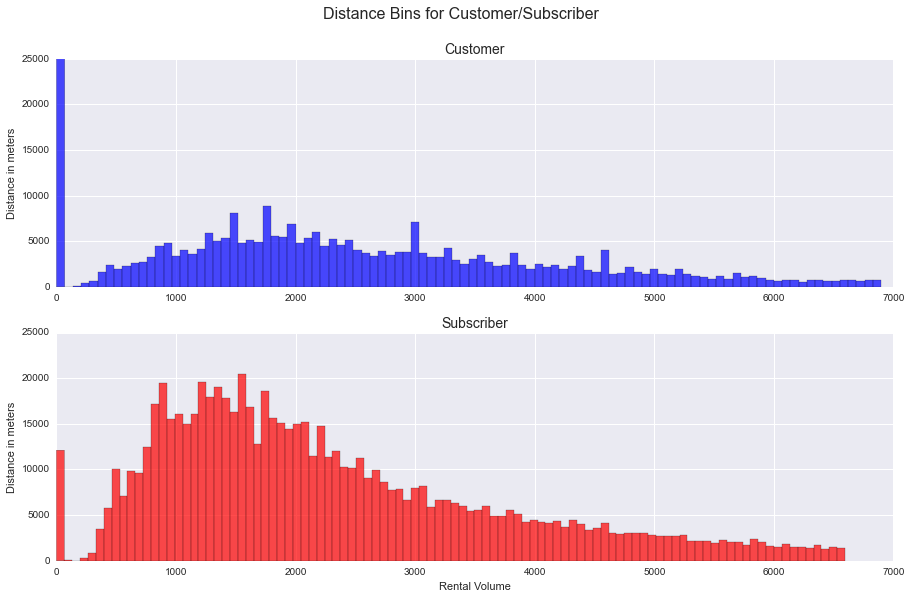

In [35]:
fig = plt.figure()
fig.set_figheight(9)
fig.set_figwidth(15)
fig.suptitle("Distance Bins for Customer/Subscriber", fontsize=16)
ax = plt.subplot("211")
df_temp = df_divvy[df_divvy.usertype=="Customer"]
df_temp[df_temp.distance<df_temp.distance.quantile(0.95)].distance.hist(alpha=0.7,bins=100,color="blue")
plt.ylim(0,25000)
ax.set_ylabel("Distance in meters")
ax.set_title("Customer",fontsize=14)

ax = plt.subplot("212")
df_temp = df_divvy[df_divvy.usertype=="Subscriber"]
df_temp[df_temp.distance<df_temp.distance.quantile(0.95)].distance.hist(alpha=0.7,bins=100,color="red")
ax.set_title("Subscriber",fontsize=14)
ax.set_ylabel("Distance in meters")
plt.ylim(0,25000)
plt.xlabel("Rental Volume")
plt.show()
                    

It is clear from the above plots that the subscribers in general ride longer distances, as well as contribute to the majority of bike rentals. However, the customers (or tourists/one-time riders) also contribute to a significant number of rides.
Within the customers, we can think of the riders as-
1. tourists- riders, who rent bikes on weekends and Thursdays.
2. daily-riders- who do not have active subscription, and are riding these bikes on Monday-Wednesday.
##### 2. Lets look at who are the most active bike renters in the subscribers category-

In [36]:
def explore(x):
    return pd.Series({"Subscriber":np.sum((x.usertype=="Subscriber")).astype(int),
                      "Customer":np.sum((x.usertype=="Customer")).astype(int)})
df_birthyear_agg=df_divvy.groupby("birthyear").apply(explore)

In [37]:
df_birthyear_agg.reset_index(inplace=True)

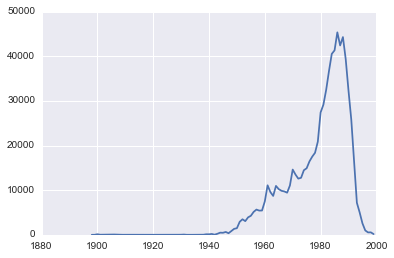

In [38]:
plot(df_birthyear_agg.birthyear,df_birthyear_agg.Subscriber)
plt.show()

In [39]:
df_birthyear_agg.sort(["Subscriber"],ascending=False).head(10)

birthyear  Customer  Subscriber
61       1986         0       45352
63       1988         2       44295
62       1987         0       42418
60       1985        13       41319
59       1984         0       40523
64       1989         0       39337
58       1983         0       36683
57       1982         0       32490
65       1990         0       32280
56       1981         0       29144

From the above graph and table we see that the millenials are the largest group of subscribers. 

One can also note that there are a few subscribers with the age of 100 and over. It would seem that these subscribers have not reported their correct age, or if they have, then they are in the pink of health. 

##### 3. Lets now look at how the weather affects bike rental volumes. For this purpose we will roll up bike rentals to the day.
##### a) First we will take a look at the mean temperature and total ridership
Here we will create a few new features-<br>
a) total rides: the total number of rentals for the day<br>
b) average trip duration for the day (in seconds)<br>
c) average trip distance for the day (in meters)<br>
d) birth_year_diff_86 - the difference in birth year from 1986. This is based on the preceding analysis.<br>

In [40]:
def roll_up(x):
    return pd.Series({"total_rides":np.count_nonzero(x),
                      "avg_trip_duration_s":np.mean(x.tripduration),
                      "avg_distance_m":np.mean(x.distance),
                      "male":np.count_nonzero(x.gender=="Male"),
                      "female":np.count_nonzero(x.gender=="Female"),
                      "birth_year_diff_86":np.mean(1986-x.birthyear)})
df_divvy_group=df_divvy.groupby(["usertype","date"]).apply(roll_up)

In [41]:
df_divvy_group.reset_index(inplace=True)

In [42]:
df_divvy_group = pd.merge(df_divvy_group,weather,left_on="date", right_on="CDT")

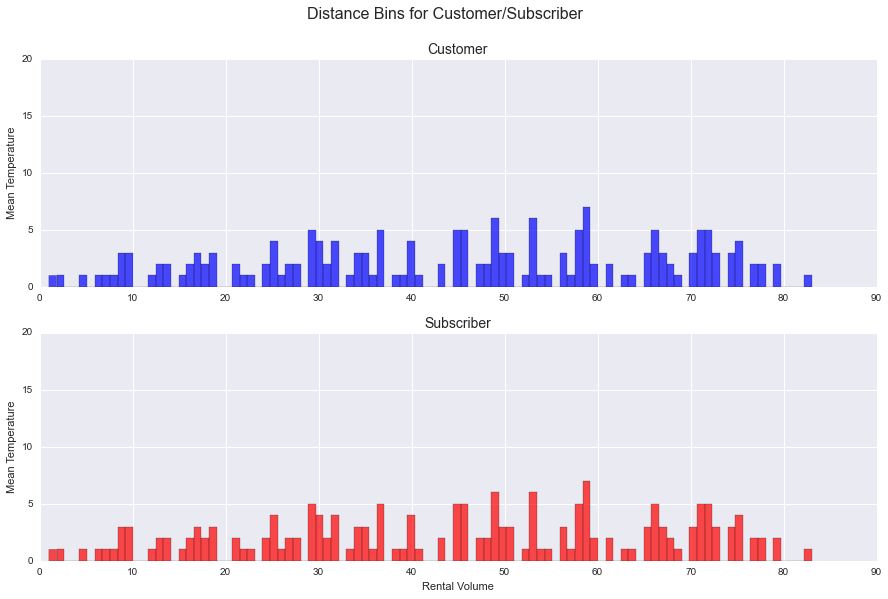

In [43]:
fig = plt.figure()
fig.set_figheight(9)
fig.set_figwidth(15)
fig.suptitle("Distance Bins for Customer/Subscriber", fontsize=16)
ax = plt.subplot("211")
df_temp = df_divvy_group[df_divvy_group.usertype=="Customer"]
df_temp['Mean TemperatureF'].hist(alpha=0.7,bins=100,color="blue")
plt.ylim(0,20)
ax.set_ylabel("Mean Temperature")
ax.set_title("Customer",fontsize=14)

ax = plt.subplot("212")
df_temp = df_divvy_group[df_divvy_group.usertype=="Subscriber"]
df_temp['Mean TemperatureF'].hist(alpha=0.7,bins=100,color="red")
ax.set_title("Subscriber",fontsize=14)
ax.set_ylabel("Mean Temperature")
plt.ylim(0,20)
plt.xlabel("Rental Volume")
plt.show()

In [44]:
fig = plt.figure()
fig.set_figheight(9)
fig.set_figwidth(15)
fig.suptitle("Temperature and the rider", fontsize=16)
ax = plt.subplot("211")
df_temp = df_divvy_group[df_divvy_group.usertype=="Customer"]
ax.scatter(df_temp["Mean TemperatureF"],df_temp.total_rides,color="blue")
ax.set_title("Customer",fontsize=14)

ax = plt.subplot("212")
df_temp = df_divvy_group[df_divvy_group.usertype=="Subscriber"]
ax.scatter(df_temp["Mean TemperatureF"],df_temp.total_rides,color="red")
ax.set_title("Subscriber",fontsize=14)
plt.show()

Clearly there is a relationship between total ridership and the temperature. The relationship seems to be slightly exponential for `Customers` v/s `Subscribers`. `Subscribers` can be seen hiring bikes at much lower temperatures. 
##### b) Now lets look at the precipitation in inches and how that affects the ridership

In [45]:
def fun_sum(x):
    return pd.Series({"TotalRidership":np.sum(x.total_rides)})

In [46]:
fig = plt.figure()
fig.set_figheight(9)
fig.set_figwidth(15)
fig.suptitle("Precipitation and the rider volume", fontsize=16)
ax = plt.subplot("211")
df_temp = df_divvy_group[df_divvy_group.usertype=="Customer"]
df_=df_temp.groupby("PrecipitationIn").apply(fun_sum)
df_.reset_index(inplace=True)
ax.plot(df_.PrecipitationIn,df_.TotalRidership,color="blue")
ax.set_title("Customer",fontsize=14)

df_temp = df_divvy_group[df_divvy_group.usertype=="Subscriber"]
df_=df_temp.groupby("PrecipitationIn").apply(fun_sum)
df_.reset_index(inplace=True)
ax.plot(df_.PrecipitationIn,df_.TotalRidership,color="red")
ax.set_title("Subscriber",fontsize=14)
plt.show()

As can be seen, precipitation results in a drastic drop in ridership.
##### c) How does wind speed affect the total rider volume?

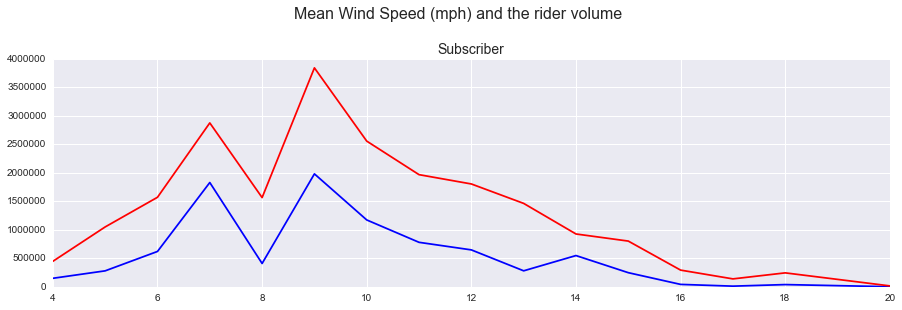

In [47]:
fig = plt.figure()
fig.set_figheight(9)
fig.set_figwidth(15)
fig.suptitle("Mean Wind Speed (mph) and the rider volume", fontsize=16)
ax = plt.subplot("211")
df_temp = df_divvy_group[df_divvy_group.usertype=="Customer"]
df_=df_temp.groupby("Mean Wind SpeedMPH").apply(fun_sum)
df_.reset_index(inplace=True)
ax.plot(df_['Mean Wind SpeedMPH'],df_.TotalRidership,color="blue")
ax.set_title("Customer",fontsize=14)

df_temp = df_divvy_group[df_divvy_group.usertype=="Subscriber"]
df_=df_temp.groupby("Mean Wind SpeedMPH").apply(fun_sum)
df_.reset_index(inplace=True)
ax.plot(df_['Mean Wind SpeedMPH'],df_.TotalRidership,color="red")
ax.set_title("Subscriber",fontsize=14)
plt.show()

As we see from the above graph, the rider volume is affected by the wind speed, however there are multiple sections in this graph. We see that the rider volume increases between 0 - 7 mph, however there is a sudden dip at 8mph. This could probably be attributed to fewer days with 8 mph wind speeds, and hence a lower total ridership volume. We notice that right after 9 mph the total rider volume starts a steady decline. 
##### d) Lets look at day of the week and how that affects ridership

In [48]:
df_divvy_group["day_of_year"] = df_divvy_group.date.dt.dayofyear
df_divvy_group["day_of_week_mon_is_0"] = df_divvy_group.date.dt.dayofweek

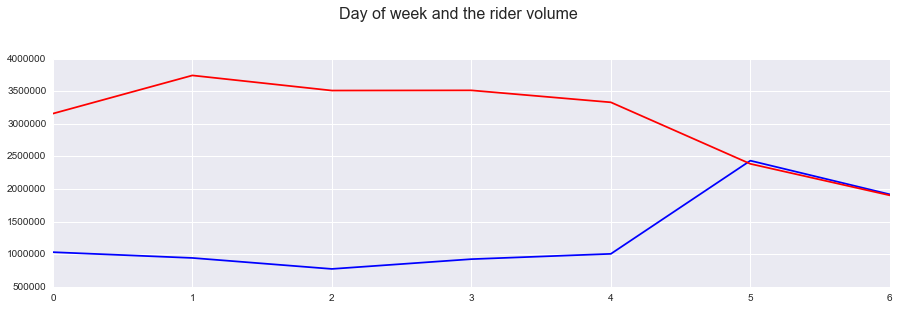

In [49]:
fig = plt.figure()
fig.set_figheight(9)
fig.set_figwidth(15)
ax = plt.subplot("211")
fig.suptitle("Day of week and the rider volume", fontsize=16)
df_temp = df_divvy_group[df_divvy_group.usertype=="Customer"]
df_=df_temp.groupby("day_of_week_mon_is_0").apply(fun_sum)
df_.reset_index(inplace=True)
ax.plot(df_.day_of_week_mon_is_0,df_.TotalRidership,color="blue")

df_temp = df_divvy_group[df_divvy_group.usertype=="Subscriber"]
df_=df_temp.groupby("day_of_week_mon_is_0").apply(fun_sum)
df_.reset_index(inplace=True)
ax.plot(df_.day_of_week_mon_is_0,df_.TotalRidership,color="red")
plt.show()

We can see from the above graphs that there is a difference between the Customer and Subscriber rider characteristic. Customers ride more on weekends, and subscribers ride more on weekdays. An idea to explore- if we explore the difference between weekend v/s weekday

In [50]:
df_divvy_group["IsWeekend"] = (df_divvy_group.day_of_week_mon_is_0>4).astype(int)

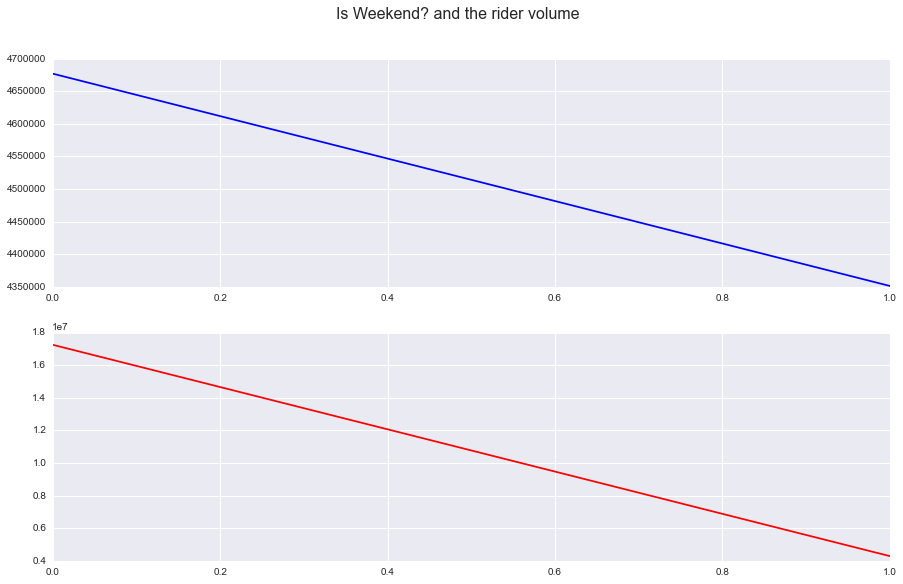

In [248]:
fig = plt.figure()
fig.set_figheight(9)
fig.set_figwidth(15)
ax = plt.subplot("211")
fig.suptitle("Is Weekend? and the rider volume", fontsize=16)
df_temp = df_divvy_group[df_divvy_group.usertype=="Customer"]
df_=df_temp.groupby("IsWeekend").apply(fun_sum)
df_.reset_index(inplace=True)
ax.plot(df_.IsWeekend,df_.TotalRidership,color="blue")

ax = plt.subplot("212")
df_temp = df_divvy_group[df_divvy_group.usertype=="Subscriber"]
df_=df_temp.groupby("IsWeekend").apply(fun_sum)
df_.reset_index(inplace=True)
ax.plot(df_.IsWeekend,df_.TotalRidership,color="red")
plt.show()

In [52]:
df_divvy_group.to_csv('../../data/Divvy_Trips_2015-Q1Q2/data-weather-distance.csv',index=False)

### Model Building
We are going to build a few different models with a different selection of features for each group of models. 
#### 1. Models being built- <br>
   a) `Lasso Regression` <br>
   b) `Ridge Regression` <br>
   c) `Gradient Boosted Regressor` <br>
   d) `Elastic Net` <br>
#### 2. Train/Test:`70/30` 
#### 3. Feature scaling: `Enabled`
#### 4. Grid Search CV: `10 Fold CV`
#### 5. Separate models for Customer and Subscriber user types
#### 6. Models for feature sets-
   a) All data except day of week <br>
   b) All data <br>
   c) Temperature, Precipitation, and Birth Year Diff From 1986 <br>
   d) All from c) and dummy coded day of week feature <br>


In [137]:
import sklearn.cross_validation as cv
import sklearn.metrics as mt
import sklearn.linear_model as lm
import sklearn.ensemble as ensemble
import sklearn.preprocessing as ps
from sklearn.grid_search import RandomizedSearchCV
from sklearn.grid_search import GridSearchCV

#### Model Building Code

In [189]:
def MSECalc(y, y_pred):
    return round(mt.mean_squared_error(y,y_pred),8)

def ModelScorer(pred_train, y_train, pred_test, y_test):
    mse_train = MSECalc(y_train, pred_train)
    mse_test = MSECalc(y_test, pred_test)
    return mse_train, mse_test

def ModelBuilder_lasso(X_train,y_train, X_test, config):
    model = GridSearchCV(lm.Lasso(),param_grid=config["params"]["lasso"],cv=config["cv"])
    model.fit(X_train,y_train)
    return model.predict(X_train), model.predict(X_test), model.best_params_

def ModelBuilder_ridge(X_train,y_train, X_test, config):
    model = GridSearchCV(lm.Ridge(),param_grid=config["params"]["ridge"],cv=config["cv"])
    model.fit(X_train,y_train)
    return model.predict(X_train), model.predict(X_test), model.best_params_

def ModelBuilder_en(X_train,y_train, X_test, config):
    model = GridSearchCV(lm.ElasticNet(),param_grid=config["params"]["en"],cv=config["cv"])
    model.fit(X_train,y_train)
    return model.predict(X_train), model.predict(X_test), model.best_params_

def ModelBuilder_gbr(X_train,y_train, X_test, config):
    model = GridSearchCV(ensemble.GradientBoostingRegressor(),param_grid=config["params"]["gbr"],cv=config["cv"])
    model.fit(X_train,y_train)
    return model.predict(X_train), model.predict(X_test), model.best_params_

def ModelComparator(X,y, config):
    X=ps.scale(X)
    y=ps.scale(y)
    X_train, X_test, y_train, y_test = cv.train_test_split(X,y, test_size=0.2, random_state=1)
    pred_train={}
    pred_test={}
    mse_train={}
    mse_test={}
    params={}
    for model in config["models"]:
        if "lasso" in model:
            pred_train[model], pred_test[model], params[model]=ModelBuilder_lasso(X_train,y_train, X_test, config)
        if "ridge" in model:
            pred_train[model], pred_test[model], params[model]=ModelBuilder_ridge(X_train,y_train, X_test, config)
        if "en" in model:
            pred_train[model], pred_test[model], params[model]=ModelBuilder_en(X_train,y_train, X_test, config)
        if "gbr" in model:
            pred_train[model], pred_test[model], params[model]=ModelBuilder_gbr(X_train,y_train, X_test, config)
        mse_train[model], mse_test[model] = ModelScorer(pred_train[model], y_train, pred_test[model], y_test)
    return mse_train, mse_test, params

#### Configuration to drive Model Building code

In [150]:
config={"models":["lasso","ridge","en","gbr"],
        "params":{"lasso":{"alpha":[0.001,0.01,0.1,1],
                           "tol":[0.0001,0.001,0.01,0.1,1]},
                  "ridge":{"alpha":[0.001,0.01,0.1,1],
                           "tol":[0.0001,0.001,0.01,0.1,1]},
                  "en":{"tol":np.linspace(0.0001, 0.1, num=15),
                        "alpha":[0.001,0.01,0.1,1],
                        "l1_ratio":np.linspace(0.01, 1, num=15)},
                  "gbr":{"learning_rate":np.linspace(0.05, 1, num=15),
                         "min_samples_leaf":range(1,10),
                         "min_samples_split":range(1,5)}},
        "cv":10}
mse_train={}
mse_test={}

#### Code for dummy coding of categoricals

In [94]:
def dummy_coding(x,col_names):
    sep={}
    for col in col_names:
        vals=list(x[col].unique())
        for val in vals:
            sep["%s_%s"%(col,val)] = (x[col]==val).astype(int)
    return sep

#### Method that encapsulates running all models, as well aggregating all scores and details about the run

In [226]:
def run_models(user,features,X,y,config):
    train, test, param = ModelComparator(X,y,config)
    mse_test = []
    mse_train = []
    params = []
    models = []
    usertype = []
    feature_set = []
    scores_df = pd.DataFrame()
    
    for model in config["models"]:
        models.append(model)
        mse_train.append(train[model])
        mse_test.append(test[model])
        params.append(param[model])
        usertype.append(user)
        feature_set.append(features)
    
    scores_df["feature_set"] = feature_set
    scores_df["usertype"] = usertype
    scores_df["model"] = models
    scores_df["mse_train"] = mse_train
    scores_df["mse_test"] = mse_test
    scores_df["rmse_train"] = np.sqrt(scores_df.mse_train)
    scores_df["rmse_test"] = np.sqrt(scores_df.mse_test)
    scores_df["params"] = params
    return scores_df

##### Variable to catch all scores

In [227]:
scores = []

### Models built with different feature sets-
#### a) All data except day of week

In [228]:
X=df_divvy_group[df_divvy_group.usertype=="Subscriber"]
X_cust=df_divvy_group[df_divvy_group.usertype=="Customer"]

X.drop(["usertype","date","CDT","Events","day_of_week_mon_is_0"],axis=1,inplace=True)
X_cust.drop(["usertype","date","CDT","Events","birth_year_diff_86","female","male","day_of_week_mon_is_0"],axis=1,inplace=True)

X_cust.dropna(inplace=True)
X.dropna(inplace=True)
y_cust=X_cust.total_rides
y=X.total_rides

X_cust.drop("total_rides",axis=1,inplace=True)
X.drop("total_rides",axis=1,inplace=True)

scores.append(run_models("subscriber","all_except_dow",X,y,config))
scores.append(run_models("customer","all_except_dow",X_cust,y_cust,config))

#### b) All data

In [230]:
X=df_divvy_group[df_divvy_group.usertype=="Subscriber"]
X_cust=df_divvy_group[df_divvy_group.usertype=="Customer"]

X.drop(["usertype","date","CDT","Events"],axis=1,inplace=True)
X_cust.drop(["usertype","date","CDT","Events","birth_year_diff_86","female","male"],axis=1,inplace=True)

X_cust.dropna(inplace=True)
X.dropna(inplace=True)
y_cust=X_cust.total_rides
y=X.total_rides

X=pd.concat([X,pd.DataFrame(dummy_coding(X,["day_of_week_mon_is_0"]))],axis=1)
X_cust=pd.concat([X_cust,pd.DataFrame(dummy_coding(X_cust,["day_of_week_mon_is_0"]))],axis=1)

X_cust.drop(["total_rides","day_of_week_mon_is_0"],axis=1,inplace=True)
X.drop(["total_rides","day_of_week_mon_is_0"],axis=1,inplace=True)

scores.append(run_models("subscriber","all_features",X,y,config))
scores.append(run_models("customer","all_features",X_cust,y_cust,config))

#### c) Weather Data Only

In [231]:
X=df_divvy_group[df_divvy_group.usertype=="Subscriber"]
X_cust=df_divvy_group[df_divvy_group.usertype=="Customer"]

X=X[["total_rides","Mean TemperatureF","PrecipitationIn","birth_year_diff_86"]]
X_cust=X[["total_rides","Mean TemperatureF","PrecipitationIn"]]
pd.tools.plotting.scatter_matrix(X,figsize=(15,10))
plt.show()

In [232]:
X_cust.dropna(inplace=True)
X.dropna(inplace=True)
y_cust=X_cust.total_rides
y=X.total_rides

X_cust.drop("total_rides",axis=1,inplace=True)
X.drop("total_rides",axis=1,inplace=True)

scores.append(run_models("subscriber","temp_prec_birth",X,y,config))
scores.append(run_models("customer","temp_prec_birth",X_cust,y_cust,config))

#### d) Weather data and day of week

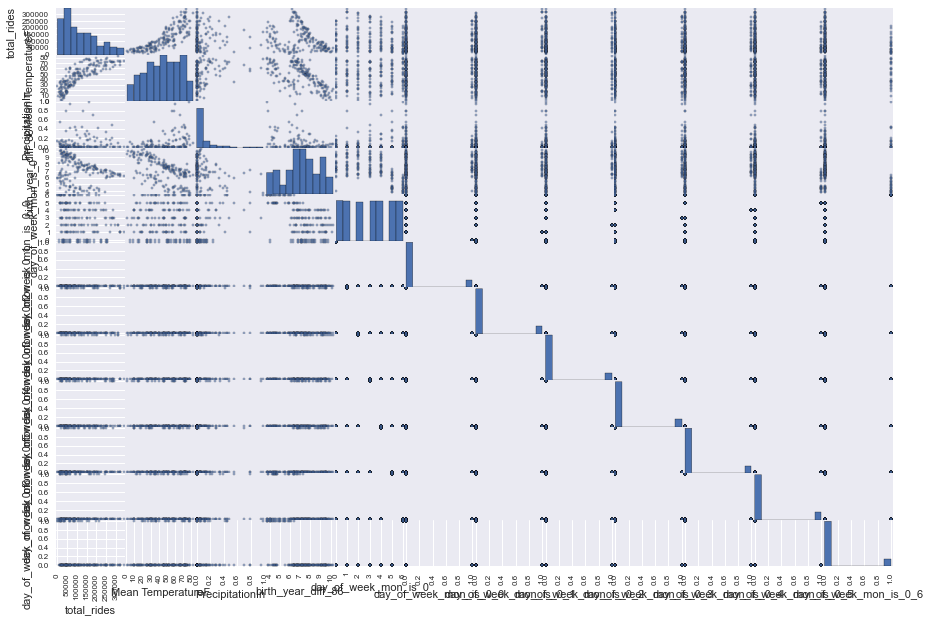

In [234]:
X=df_divvy_group[df_divvy_group.usertype=="Subscriber"]
X_cust=df_divvy_group[df_divvy_group.usertype=="Customer"]

X=X[["total_rides","Mean TemperatureF","PrecipitationIn","birth_year_diff_86","day_of_week_mon_is_0"]]
X_cust=X[["total_rides","Mean TemperatureF","PrecipitationIn","day_of_week_mon_is_0"]]

X=pd.concat([X,pd.DataFrame(dummy_coding(X,["day_of_week_mon_is_0"]))],axis=1)
X_cust=pd.concat([X_cust,pd.DataFrame(dummy_coding(X_cust,["day_of_week_mon_is_0"]))],axis=1)
pd.tools.plotting.scatter_matrix(X,figsize=(15,10))
plt.show()

In [235]:
X_cust.dropna(inplace=True)
X.dropna(inplace=True)
y_cust=X_cust.total_rides
y=X.total_rides

X_cust.drop(["total_rides","day_of_week_mon_is_0"],axis=1,inplace=True)
X.drop(["total_rides","day_of_week_mon_is_0"],axis=1,inplace=True)

scores.append(run_models("subscriber","temp_prec_birth_dow",X,y,config))
scores.append(run_models("customer","temp_prec_birth_dow",X_cust,y_cust,config))

In [236]:
scores_df = pd.concat(scores)

In [240]:
scores_df.sort("mse_test")

feature_set    usertype  model     mse_train      mse_test  \
1       all_except_dow  subscriber  ridge  2.200000e-07  2.600000e-07   
1         all_features  subscriber  ridge  2.000000e-07  3.300000e-07   
0       all_except_dow  subscriber  lasso  1.340000e-06  6.900000e-07   
2       all_except_dow  subscriber     en  1.340000e-06  6.900000e-07   
0         all_features  subscriber  lasso  1.340000e-06  6.900000e-07   
2         all_features  subscriber     en  1.340000e-06  6.900000e-07   
3         all_features  subscriber    gbr  1.035000e-05  1.207340e-03   
3       all_except_dow  subscriber    gbr  1.305000e-05  1.214040e-03   
2  temp_prec_birth_dow    customer     en  1.813251e-01  1.317287e-01   
2  temp_prec_birth_dow  subscriber     en  1.863900e-01  1.328632e-01   
1  temp_prec_birth_dow  subscriber  ridge  1.732589e-01  1.335119e-01   
1  temp_prec_birth_dow    customer  ridge  1.738899e-01  1.417032e-01   
0  temp_prec_birth_dow    customer  lasso  1.745095e-01  1.431364e-01   
0  temp_prec_birth_dow  subscriber  lasso  1.744810e-01  1.434022e-01   
3  temp_prec_birth_dow  subscriber    gbr  4.007046e-02  1.722666e-01   
3  temp_prec_birth_dow    customer    gbr  2.641917e-02  1.903296e-01   
3      temp_prec_birth  subscriber    gbr  4.543861e-02  1.954518e-01   
3       all_except_dow    customer    gbr  1.000000e-07  1.957464e-01   
0      temp_prec_birth  subscriber  lasso  2.103654e-01  2.080503e-01   
2      temp_prec_birth  subscriber     en  2.090449e-01  2.097234e-01   
1      temp_prec_birth  subscriber  ridge  2.087435e-01  2.105014e-01   
3         all_features    customer    gbr  9.000000e-08  2.334332e-01   
2       all_except_dow    customer     en  3.629435e-01  2.941157e-01   
3      temp_prec_birth    customer    gbr  1.401808e-01  3.056549e-01   
0      temp_prec_birth    customer  lasso  2.751552e-01  3.060788e-01   
2      temp_prec_birth    customer     en  2.748168e-01  3.096775e-01   
1      temp_prec_birth    customer  ridge  2.746825e-01  3.125255e-01   
2         all_features    customer     en  3.495963e-01  3.150416e-01   
0       all_except_dow    customer  lasso  3.445035e-01  6.175809e-01   
0         all_features    customer  lasso  3.289846e-01  7.095680e-01   
1       all_except_dow    customer  ridge  3.086640e-01  8.848603e-01   
1         all_features    customer  ridge  2.946653e-01  1.034366e+00   

   rmse_train  rmse_test                                             params  
1    0.000469   0.000510                  {u'alpha': 0.001, u'tol': 0.0001}  
1    0.000447   0.000574                  {u'alpha': 0.001, u'tol': 0.0001}  
0    0.001158   0.000831                  {u'alpha': 0.001, u'tol': 0.0001}  
2    0.001158   0.000831  {u'alpha': 0.001, u'tol': 0.0001, u'l1_ratio':...  
0    0.001158   0.000831                  {u'alpha': 0.001, u'tol': 0.0001}  
2    0.001158   0.000831  {u'alpha': 0.001, u'tol': 0.0001, u'l1_ratio':...  
3    0.003217   0.034747  {u'min_samples_split': 1, u'learning_rate': 0....  
3    0.003612   0.034843  {u'min_samples_split': 4, u'learning_rate': 0....  
2    0.425823   0.362944  {u'alpha': 0.1, u'tol': 0.0785928571429, u'l1_...  
2    0.431729   0.364504  {u'alpha': 0.1, u'tol': 0.05005, u'l1_ratio': ...  
1    0.416244   0.365393                      {u'alpha': 1, u'tol': 0.0001}  
1    0.417001   0.376435                      {u'alpha': 1, u'tol': 0.0001}  
0    0.417743   0.378334                   {u'alpha': 0.01, u'tol': 0.0001}  
0    0.417709   0.378685                     {u'alpha': 0.01, u'tol': 0.01}  
3    0.200176   0.415050  {u'min_samples_split': 2, u'learning_rate': 0....  
3    0.162540   0.436268  {u'min_samples_split': 4, u'learning_rate': 0....  
3    0.213163   0.442099  {u'min_samples_split': 1, u'learning_rate': 0....  
3    0.000316   0.442432  {u'min_samples_split': 4, u'learning_rate': 0....  
0    0.458656   0.456125                      {u'alpha': 0.01, u'tol': 0.1}  
2    0.457214   0.457956  {u'alpha': 0.01

## Analysis of results
### 1. For user type : Subscriber
a) It's interesting to see that the subscriber model that performed the best (and best overall compared to customer models as well) was the one with the entire feature set (except day_of_week_mon_is_0)- 

In [188]:
list(df_divvy_group.columns)

['usertype',
 'date',
 'avg_distance_m',
 'avg_trip_duration_s',
 'birth_year_diff_86',
 'female',
 'male',
 'total_rides',
 'CDT',
 'Max TemperatureF',
 'Mean TemperatureF',
 'Min TemperatureF',
 'Max Dew PointF',
 'MeanDew PointF',
 'Min DewpointF',
 'Max Humidity',
 'Mean Humidity',
 'Min Humidity',
 'Max Sea Level PressureIn',
 'Mean Sea Level PressureIn',
 'Min Sea Level PressureIn',
 'Max VisibilityMiles',
 'Mean VisibilityMiles',
 'Min VisibilityMiles',
 'Max Wind SpeedMPH',
 'Mean Wind SpeedMPH',
 'Max Gust SpeedMPH',
 'PrecipitationIn',
 'CloudCover',
 'Events',
 'WindDirDegrees',
 'day_of_year',
 'day_of_week_mon_is_0',
 'IsWeekend']

b) The best performing model was- `Ridge Regression`, `MSE` : 2.600000e-07, `RMSE` : 0.000510<br>
c) Tuned Parameters- `alpha`: 0.001, `tol`: 0.0001 <br>
d) Another interesting fact to note is that the top performing models for the Subscriber user were all linear models.<br> 
e) Models created with only the weather data performed on the lower end of the spectrum for Subscribers. This shows that Subscribers are less influenced by changes in weather conditions when it comes to renting Divvy bikes.
### 2. For the user type : Customer
a) The best performing model for Customer was trained with only weather data and day of week.
*Note: The scores list the best customer model with feature set inclusive of birth year. This is not true for the model, and is only a labeling issue.* <br>
b) The best performing model was- `Elastic Net`, `MSE` : 1.317287e-01, `RMSE` :	0.362944 <br>
c) Tuned Parameters-

In [249]:
scores_df[(scores_df.feature_set=="temp_prec_birth_dow") & (scores_df.usertype=="customer") & (scores_df.model=="en")].params.values[0]

{'alpha': 0.1, 'l1_ratio': 0.080714285714285711, 'tol': 0.078592857142857145}

d) In the case of models for Customers it can be noted that the top performing models are all linear models.<br>
e) Customers are people who rent only for the day. These rental decisions can be affected by weather conditions, as customers could be visitors etc., who are not prepared for the weather, and hence decide on the fly about renting a bike. Subscribers on the other hand are using bikes more for commuting to work, as can be seen from total rider volume by user type for a given day of the week (EDA section). 